![Screenshot From 2025-06-30 19-40-20.png](<attachment:Screenshot From 2025-06-30 19-40-20.png>)
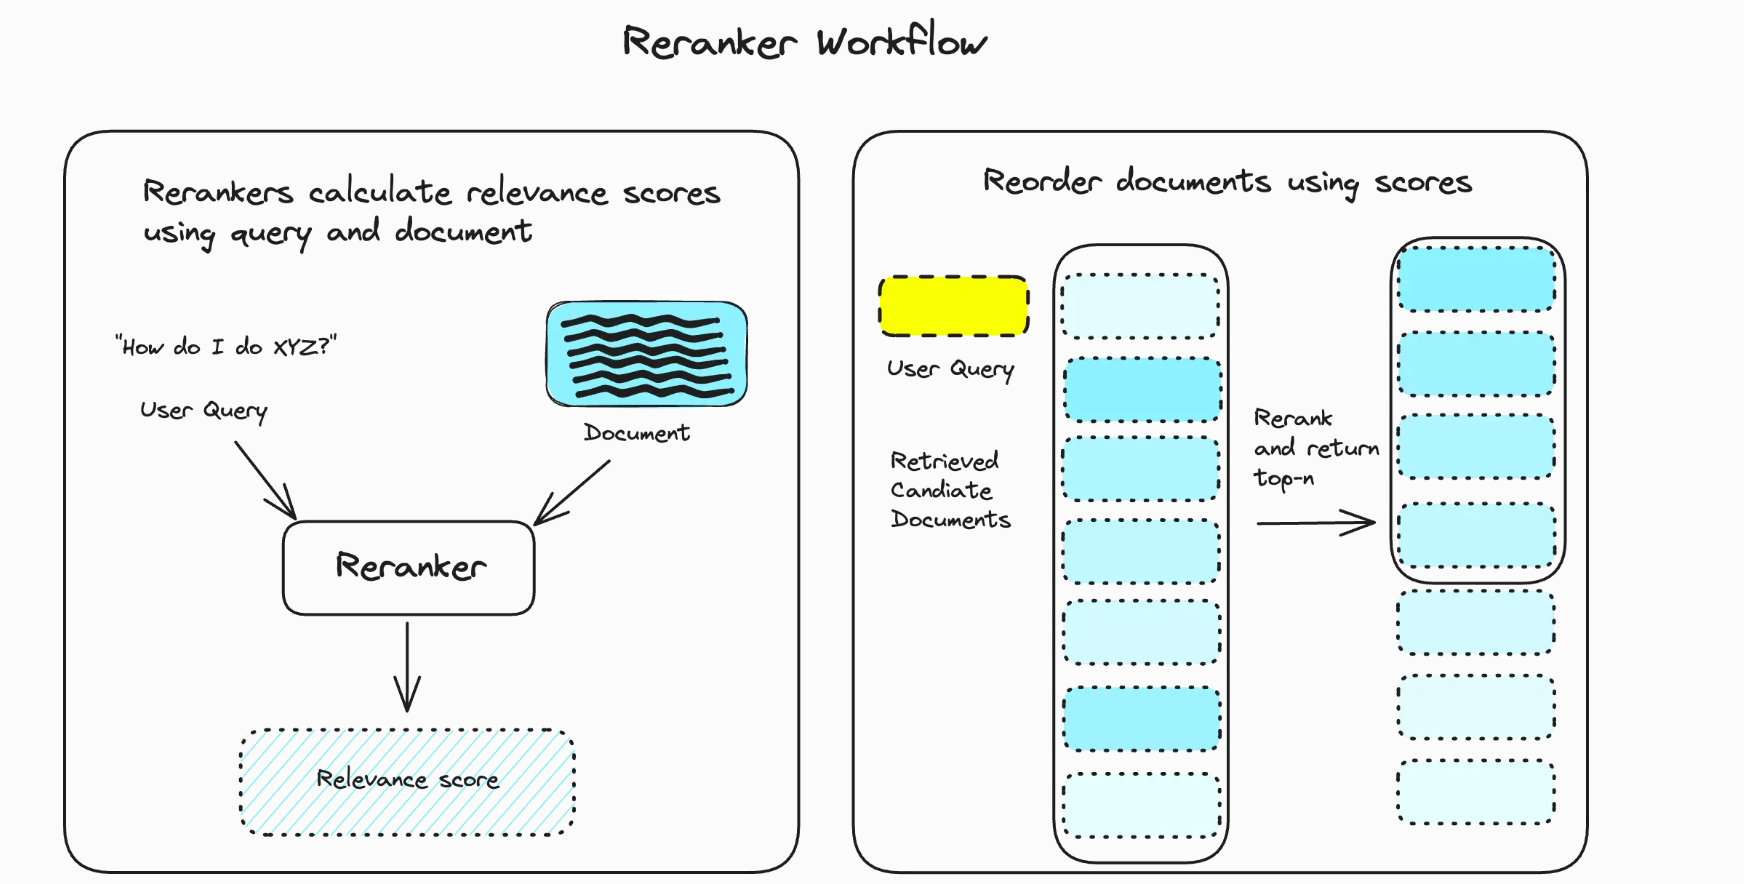

In [1]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!pip install openai
!pip install gradio

# Clean up the notebook
clean_notebook()

Notebook cleaned.


In [19]:
%%writefile .env
OPENAI_API_KEY=your_api_key_here
OPENTYPHOON_API_KEY=api_key_here

Writing .env


In [20]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

True

In [ ]:

# Import required libraries
import openai
from openai import OpenAI
import os

api_key = os.getenv("OPENAI_API_KEY")  
api_key =""
openai_client = OpenAI(api_key=api_key)

# Define the model to use (e.g., gpt-3.5-turbo or gpt-4)
model_name = "gpt-3.5-turbo"

print("OpenAI client initialized successfully!")

OpenAI client initialized successfully!


In [15]:
# Step 1: Import necessary libraries
import openai
from openai import OpenAI
import numpy as np
from typing import List, Dict
import json
import re


# Step 3: Function to generate completion from OpenAI API
def complete(user_prompt: str, system_prompt: str, max_tokens: int = 300) -> str:
    """
    Generates a response from OpenAI API using user and system prompts.
    
    Args:
        user_prompt (str): The user's query or input.
        system_prompt (str): Instructions or context for the model.
        max_tokens (int): Maximum number of tokens in the response.
    
    Returns:
        str: The model's response.
    """
    try:
        completion = openai_client.chat.completions.create(
            model=model_name,
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt}
            ],
            temperature=0.2,  # Low temperature for consistent outputs
            max_tokens=max_tokens
        )
        return completion.choices[0].message.content.strip()
    except Exception as e:
        return f"Error in API call: {str(e)}"

def score_document(query: str, document: str, system_prompt: str) -> float:
    """
    Scores a document based on its relevance to the query using OpenAI API.
    
    Args:
        query (str): The search query.
        document (str): The document to score.
        system_prompt (str): Instructions for scoring.
    
    Returns:
        float: Relevance score between 0 and 1.
    """
    
    # Improved system prompt for more consistent scoring
    enhanced_system_prompt = f"""
{system_prompt}
IMPORTANT INSTRUCTIONS:
- You must respond with ONLY a numerical score between 0.0 and 1.0
- 0.0 means completely irrelevant
- 1.0 means perfectly relevant
- Use decimal precision (e.g., 0.7, 0.85, 0.3)
- Do NOT include any explanation, text, or additional content
- Format your response as: 0.X (where X is the decimal portion)
Examples of correct responses:
- 0.8
- 0.45
- 0.0
- 1.0
"""
    
    # Improved user prompt with clear instructions
    user_prompt = f"""
Query: "{query}"
Document: "{document}"
Rate the relevance of this document to the query. Respond with only a number between 0.0 and 1.0:
"""
    
    try:
        response = complete(user_prompt, enhanced_system_prompt, max_tokens=10)
        print(f"Raw response: {response}")  # Debugging line
        
        # Extract float using regex
        float_pattern = r'(?:^|\s)([01](?:\.\d+)?|\.\d+)(?:\s|$)'
        match = re.search(float_pattern, response.strip())
        
        if match:
            score = float(match.group(1))
            # Ensure score is within valid range
            return max(0.0, min(1.0, score))
        else:
            print(f"No valid float found in response: {response}")
            return 0.0
        
    except Exception as e:
        print(f"Error in score_document: {str(e)}")
        return 0.0


In [16]:

def rerank_documents(query: str, documents: List[str], system_prompt: str) -> List[Dict[str, any]]:
    """
    Rerank documents based on their relevance to the query.
    
    Args:
        query (str): The search query.
        documents (List[str]): List of documents to rank.
        system_prompt (str): Instructions for scoring.
    
    Returns:
        List[Dict]: List of documents with scores, sorted by relevance.
    """
    scored_documents = []
    
    for doc in documents:
        score = score_document(query, doc, system_prompt)
        scored_documents.append({
            'document': doc,
            'score': score
        })
    
    # Sort by score in descending order (highest relevance first)
    scored_documents.sort(key=lambda x: x['score'], reverse=True)
    
    return scored_documents



# Define the system prompt for scoring
system_prompt = """
You are an expert in evaluating document relevance. Given a query and a document, provide a relevance score between 0 (completely irrelevant) and 1 (highly relevant) as a single number. Base your score on how well the document answers or relates to the query. Return only the score, nothing else.
"""

# Example query and documents (20 documents for testing)
query = "What is machine learning?"
documents = [
    "Machine learning is a subset of artificial intelligence that enables systems to learn from data and improve over time.",
    "Python is a popular programming language used in data science and machine learning applications.",
    "Deep learning is a type of machine learning that uses neural networks with many layers to process complex data.",
    "Web development involves creating websites using HTML, CSS, and JavaScript for frontend interfaces.",
    "Supervised learning is a machine learning approach where algorithms learn from labeled training data to make predictions.",
    "Natural language processing combines linguistics and machine learning to help computers understand human language.",
    "Computer vision uses machine learning algorithms to identify and analyze visual content in images and videos.",
    "The stock market experienced significant volatility last week due to economic uncertainty and inflation concerns.",
    "Cooking pasta requires boiling water, adding salt, and timing the cooking process for optimal texture.",
    "Neural networks are computational models inspired by biological brain structures used in machine learning.",
    "Climate change affects global weather patterns and requires immediate action from governments worldwide.",
    "Unsupervised learning algorithms find hidden patterns in data without using labeled examples or target outputs.",
    "Feature engineering in machine learning involves selecting and transforming variables to improve model performance.",
    "Gradient descent is an optimization algorithm commonly used to train machine learning models by minimizing loss functions.",
    "Gardening requires understanding soil types, watering schedules, and seasonal planting for successful crop growth.",
    "Ensemble methods in machine learning combine multiple models to achieve better predictive performance than individual models.",
    "Space exploration has led to numerous technological innovations that benefit life on Earth in unexpected ways."
]

# Rerank documents
ranked_results = rerank_documents(query, documents, system_prompt)

# Print results
print(f"Query: {query}\n")
for i, result in enumerate(ranked_results, 1):
    print(f"Rank {i}:")
    print(f"Document: {result['document']}")
    print(f"Score: {result['score']:.2f}\n")

Raw response: 0.9
Raw response: 0.7
Raw response: 0.8
Raw response: 0.0
Raw response: 0.6
Raw response: 0.6
Raw response: 0.8
Raw response: 0.0
Raw response: 0.0
Raw response: 0.8
Raw response: 0.0
Raw response: 0.6
Raw response: 0.6
Raw response: 0.8
Raw response: 0.1
Raw response: 0.6
Raw response: 0.0
Query: What is machine learning?

Rank 1:
Document: Machine learning is a subset of artificial intelligence that enables systems to learn from data and improve over time.
Score: 0.90

Rank 2:
Document: Deep learning is a type of machine learning that uses neural networks with many layers to process complex data.
Score: 0.80

Rank 3:
Document: Computer vision uses machine learning algorithms to identify and analyze visual content in images and videos.
Score: 0.80

Rank 4:
Document: Neural networks are computational models inspired by biological brain structures used in machine learning.
Score: 0.80

Rank 5:
Document: Gradient descent is an optimization algorithm commonly used to train m